In [1]:
import warnings
warnings.filterwarnings("ignore")

import torch
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
import pickle
import numpy
import argparse
import os
import platform
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt

from molzip.utils import *
from molzip.autoencoder import *
from molzip.molzip import *
# import mdshare

In [2]:
pdb = 'pentapeptide-impl-solv.pdb'
traj = 'pentapeptide-00-500ns-impl-solv.xtc'

In [3]:
train(traj=traj, top=pdb, stride=10, fname='pep', epochs=5)

Device name: NVIDIA GeForce GTX 1060 3GB

Trajectory stats : #_Frames = 5001	#_Atoms = 94
______________________________________________________________________ 

Start reading coordinates from trajectory to train model...
[500 frames with stride 10]


Loading trajectory:   0.00% |                    |

______________________________________________________________________

Training Deep Convolutional AutoEncoder model



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | model   | AE   | 27.3 M | train
1 | loss_fn | Loss | 0      | train
-----------------------------------------
27.3 M    Trainable params
0         Non-trainable params
27.3 M    Total params
109.169   Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


Autoencoder training complete
______________________________________________________________________







In [4]:
# if torch.cuda.is_available():
#         device = torch.device('cuda')
# model = torch.load('pep_compressed/pep_model.pt').to(device)

In [5]:
# model.epoch_losses = list(np.loadtxt('pep_compressed/pep_losses.dat', usecols=1))

In [6]:
# model.loss_path

In [7]:
# checkpoint_callback = ModelCheckpoint(
#     dirpath='pep_compressed',
#     filename=f'pep_checkpoint',
#     save_top_k=1  # Save the best checkpoint
#     )
    
# trainer = pl.Trainer(
#     max_epochs=len(model.epoch_losses)+10,
#     callbacks=[checkpoint_callback]
#     )

In [8]:
# traj_ = read_traj(traj_=traj, top_=pdb, stride=10)
# n_atoms = traj_.shape[2]
# traj_dl = DataLoader(traj_, batch_size=128, shuffle=True, drop_last=True, num_workers=4)

# trainer.fit(model, traj_dl, ckpt_path='pep_compressed/pep__checkpoint.ckpt')

In [9]:
cont_train(traj=traj, top=pdb, model='pep_compressed/pep_model.pt', checkpoint='pep_compressed/pep_checkpoint.ckpt', stride=10, epochs=5)

Device name: NVIDIA GeForce GTX 1060 3GB



Trajectory stats : #_Frames = 5001	#_Atoms = 94
______________________________________________________________________ 

Start reading coordinates from trajectory to train model...
[500 frames with stride 10]


Loading trajectory:   0.00% |                    |
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at pep_compressed/pep_checkpoint.ckpt


______________________________________________________________________



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | model   | AE   | 27.3 M | train
1 | loss_fn | Loss | 0      | train
-----------------------------------------
27.3 M    Trainable params
0         Non-trainable params
27.3 M    Total params
109.169   Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode
Restored all states from the checkpoint at pep_compressed/pep_checkpoint.ckpt


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


Autoencoder training complete
______________________________________________________________________





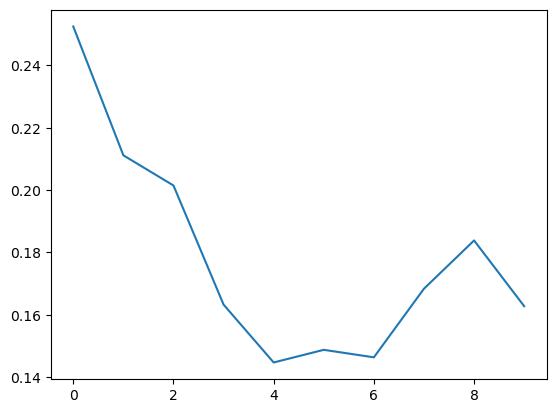

In [10]:
plt.plot(np.loadtxt('pep_compressed/pep_losses.dat')[:,1])

In [11]:
compress(traj=traj, top=pdb, model='pep_compressed/pep_model.pt', stride=10, out='pep_compressed')

Device name: NVIDIA GeForce GTX 1060 3GB

Trajectory stats : #_Frames = 5001	#_Atoms = 94
______________________________________________________________________ 

Start reading coordinates from trajectory to train model...
[500 frames with stride 10]


Loading trajectory:   0.00% |                    |


______________________________________________________________________



Compressing : 100%|██████████| 4/4 [00:00<00:00, 26.88it/s]


______________________________________________________________________

Original Size [MB]   :          2.221
Compressed Size [MB] :          0.041
Compression %        :         98.137
---
